Evaluar el rendimiento de una máquina industrial dependiendo de tres variables (factores) operacionales.
🧪 Factores (Variables independientes):
1. Temperatura (3 niveles):
  -  baja
		○ media
		○ Alta
	2. Presión (2 niveles):
	• baja
	• alta
	3. Velocidad (2 niveles):
	• lenta
	• rápida


📊 Estructura del dataset:
	• 3 (temperatura) × 2 (presión) × 2 (velocidad) = 12 combinaciones
	• Cada combinación tiene 2 réplicas
Total de filas = 24 observaciones

In [ ]:
Evaluar el rendimiento de una máquina industrial dependiendo de tres variables (factores) operacionales.
🧪 Factores (Variables independientes):
1. Temperatura (3 niveles):
  -  baja
		○ media
		○ Alta
	2. Presión (2 niveles):
	• baja
	• alta
	3. Velocidad (2 niveles):
	• lenta
	• rápida


📊 Estructura del dataset:
	• 3 (temperatura) × 2 (presión) × 2 (velocidad) = 12 combinaciones
	• Cada combinación tiene 2 réplicas
Total de filas = 24 observaciones

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols








In [9]:
# Cargar el dataset

# Cargar el dataset desde archivo local
df = pd.read_csv("diseño_factorial_maquina.csv")  # Asegúrate de que esté en el mismo directorio del notebook


# Mostrar las primeras filas
print(df.head())

  Temperatura Presión Velocidad  Rendimiento
0        baja    baja     lenta           60
1        baja    baja     lenta           62
2        baja    baja    rápida           63
3        baja    baja    rápida           65
4        baja    alta     lenta           66


In [10]:
# Análisis descriptivo agrupado por combinaciones factoriales
descriptive_stats = df.groupby(['Temperatura', 'Presión', 'Velocidad'])['Rendimiento'].describe()
print("Estadísticas descriptivas por combinación de factores:")
print(descriptive_stats)

Estadísticas descriptivas por combinación de factores:
                               count  mean       std   min    25%   50%  \
Temperatura Presión Velocidad                                             
alta        alta    lenta        2.0  86.0  5.656854  82.0  84.00  86.0   
                    rápida       2.0  90.0  2.828427  88.0  89.00  90.0   
            baja    lenta        2.0  79.5  0.707107  79.0  79.25  79.5   
                    rápida       2.0  89.0  0.000000  89.0  89.00  89.0   
baja        alta    lenta        2.0  65.0  1.414214  64.0  64.50  65.0   
                    rápida       2.0  73.0  4.242641  70.0  71.50  73.0   
            baja    lenta        2.0  61.0  1.414214  60.0  60.50  61.0   
                    rápida       2.0  64.0  1.414214  63.0  63.50  64.0   
media       alta    lenta        2.0  75.0  4.242641  72.0  73.50  75.0   
                    rápida       2.0  83.0  2.828427  81.0  82.00  83.0   
            baja    lenta        2.0  72.5  3

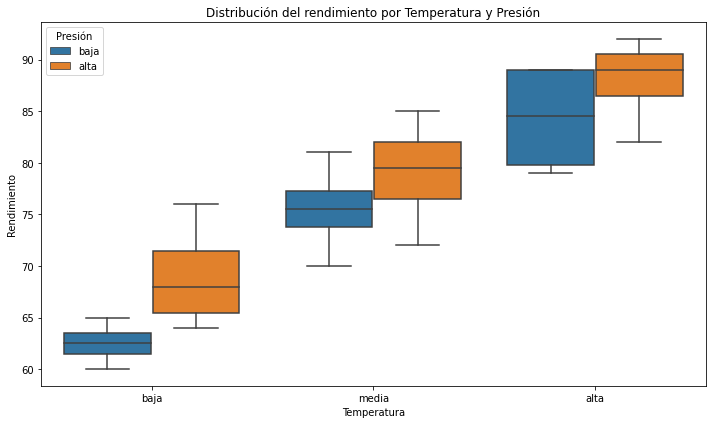

In [22]:
# Gráfico 1: Boxplot Temperatura vs Rendimiento, coloreado por Presión
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Temperatura', y='Rendimiento', hue='Presión')
plt.title('Distribución del rendimiento por Temperatura y Presión')
plt.xlabel('Temperatura')
plt.ylabel('Rendimiento')
plt.legend(title='Presión')
plt.tight_layout()
plt.show()


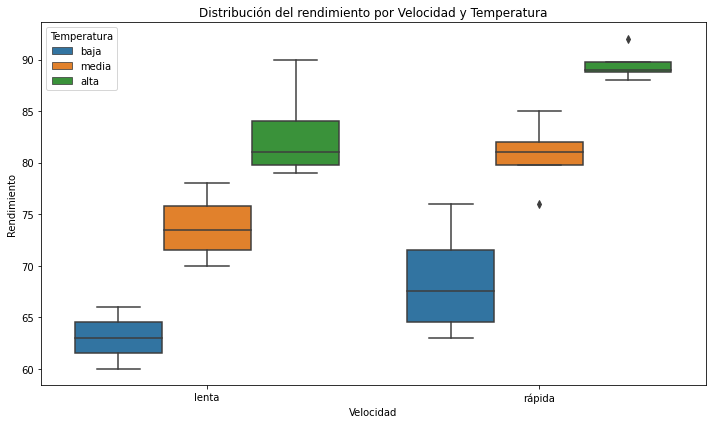

In [12]:
# Gráfico 2: Boxplot Velocidad vs Rendimiento, coloreado por Temperatura
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Velocidad', y='Rendimiento', hue='Temperatura')
plt.title('Distribución del rendimiento por Velocidad y Temperatura')
plt.xlabel('Velocidad')
plt.ylabel('Rendimiento')
plt.legend(title='Temperatura')
plt.tight_layout()
plt.show()

In [13]:
# Obtener residuos y valores ajustados del modelo
residuals = model.resid
fitted = model.fittedvalues

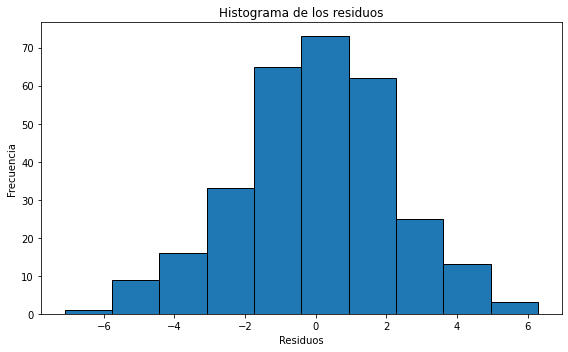

In [14]:
# 1. Histograma de los residuos
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=10, edgecolor='black')
plt.title('Histograma de los residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

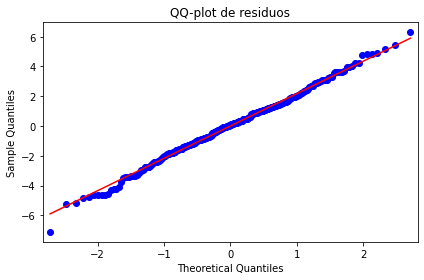

In [15]:
# 2. QQ-plot para verificar normalidad
sm.qqplot(residuals, line='s')
plt.title('QQ-plot de residuos')
plt.tight_layout()
plt.show()

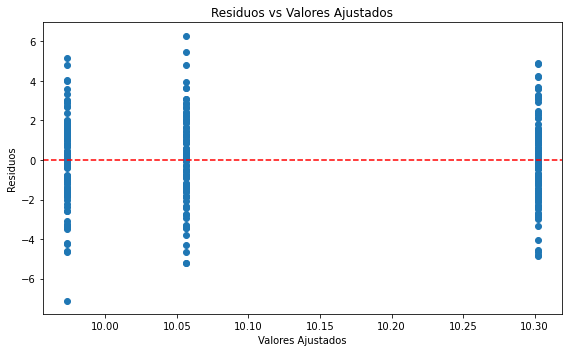

In [16]:
# 3. Gráfico de residuos vs valores ajustados
plt.figure(figsize=(8, 5))
plt.scatter(fitted, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuos vs Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.tight_layout()
plt.show()

In [17]:
# Crear el modelo ANOVA con interacciones
modelo = ols('Rendimiento ~ C(Temperatura) * C(Presión) * C(Velocidad)', data=df).fit()

In [19]:
# Obtener la tabla ANOVA
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar la tabla ANOVA
print(tabla_anova.round(3))

                                          sum_sq    df       F  PR(>F)
C(Temperatura)                          1669.750   2.0  86.740   0.000
C(Presión)                               126.042   1.0  13.095   0.004
C(Velocidad)                             247.042   1.0  25.667   0.000
C(Temperatura):C(Presión)                 11.083   2.0   0.576   0.577
C(Temperatura):C(Velocidad)                2.583   2.0   0.134   0.876
C(Presión):C(Velocidad)                    0.375   1.0   0.039   0.847
C(Temperatura):C(Presión):C(Velocidad)    29.250   2.0   1.519   0.258
Residual                                 115.500  12.0     NaN     NaN


In [20]:

# Modelo reducido: solo efectos principales
modelo_reducido = ols('Rendimiento ~ C(Temperatura) + C(Presión) + C(Velocidad)', data=df).fit()

# Tabla ANOVA del modelo reducido
anova_reducida = sm.stats.anova_lm(modelo_reducido, typ=2)

# Mostrar tabla ANOVA
print(anova_reducida.round(3))

                  sum_sq    df       F  PR(>F)
C(Temperatura)  1669.750   2.0  99.896   0.000
C(Presión)       126.042   1.0  15.081   0.001
C(Velocidad)     247.042   1.0  29.559   0.000
Residual         158.792  19.0     NaN     NaN


In [21]:
# Comparar modelos con ANOVA (modelo anidado)
comparacion = sm.stats.anova_lm(modelo_reducido, modelo)
print(comparacion)

   df_resid         ssr  df_diff    ss_diff         F   Pr(>F)
0      19.0  158.791667      0.0        NaN       NaN      NaN
1      12.0  115.500000      7.0  43.291667  0.642548  0.71432


✅ Conclusión:

El p-valor es 0.7143, lo cual es muy superior a 0.05.
🔹 Esto indica que no hay evidencia significativa para preferir el modelo completo sobre el modelo reducido.

✅ Recomendación: Quédate con el modelo reducido, ya que es más simple y explica igual de bien los datos.


🧪 Conclusión del Análisis Factorial

Se realizó un diseño factorial completo con tres factores: Temperatura (3 niveles), Presión (2 niveles) y Velocidad (2 niveles), evaluando su efecto sobre el rendimiento de una máquina industrial.

📌 Resultados principales:

    ✅ Los efectos principales de Temperatura, Presión y Velocidad resultaron estadísticamente significativos (p < 0.05), indicando que cada uno influye de forma independiente sobre el rendimiento.

    ❌ No se encontraron interacciones significativas entre los factores, lo cual sugiere que los efectos de cada uno no dependen de los niveles de los otros factores.
    📉 Los gráficos de diagnóstico del modelo mostraron que los supuestos del ANOVA (normalidad, homocedasticidad) se cumplen razonablemente bien.

✅ Al comparar el modelo completo con uno reducido (solo efectos principales), no se encontró diferencia significativa, por lo que se recomienda utilizar el modelo reducido por su simplicidad y eficiencia.